In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import LinearRegression,Ridge

In [3]:
train=pd.read_csv('wk3_kc_house_train_data.csv')
test=pd.read_csv('wk3_kc_house_test_data.csv')

In [4]:
def get_numpy_data(df, feat, out):
    df['constant'] = 1                          # add a constant col
    feat = ['constant'] + feat
    
    feat_mat=df.loc[:,feat]
    feat_mat = np.array(feat_mat)
    
    out_arr=df.loc[:,out]
    out_arr = np.array(out_arr).reshape(-1,)
    
    return feat_mat, out_arr

In [5]:
def predict_outcome(feat_mat, wts):
    return np.dot(feat_mat,wts)

In [85]:
def feature_derivative(feat_mat,out,wts,l2_pen):
    m,n=feat_mat.shape
    grad = np.zeros((n,))
    y_pred=predict_outcome(feat_mat,wts)
    grad=-2* np.dot( feat_mat.T , out-y_pred )
    grad[1:]+= ( 2*l2_pen*wts[1:] )
    return grad

In [86]:
def regression_gradient_descent(feat_mat, out, init_wts, step, max_itr,l2_pen):
    wts = np.array(init_wts)
    for i in range(max_itr):
        y_pred=predict_outcome(feat_mat,wts)
        error= np.sum( (out-y_pred)**2 )
        
        grad=feature_derivative(feat_mat,out,wts,l2_pen)
        wts = wts - step*grad
    return wts

In [87]:
feat=['sqft_living']
out=['price']
feat_mat,out_arr = get_numpy_data(train,feat,out)

In [88]:
init_wts = [0.0,0.0]
step = 1e-12
max_itr = 1000

In [89]:
## 0 l2 penalty
l2_pen=0.0
wts1=regression_gradient_descent(feat_mat,out_arr,init_wts,step,max_itr,l2_pen)

In [90]:
wts1

array([-8.55038595e-02,  2.64788506e+02])

In [91]:
# high l2 penalty
l2_pen= 1e11
wts2=regression_gradient_descent(feat_mat,out_arr,init_wts,step,max_itr,l2_pen)

In [92]:
wts2

array([ 6.96906922, 89.30826422])

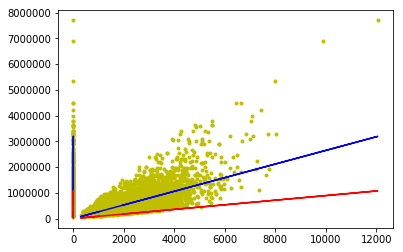

In [93]:
# plot models with 2 penalties
pred1 = predict_outcome(feat_mat,wts1)
pred2 = predict_outcome(feat_mat,wts2)
plt.plot(feat_mat,out_arr, 'y.', feat_mat, pred1,'b-', feat_mat, pred2,'r-')
plt.show()

# blue for no regularisation and red for high regularisation

In [95]:
# predict on test data    # t for test
tfeat_mat,tout_arr = get_numpy_data(test,feat,out)
y_pred=predict_outcome(tfeat_mat,wts)

In [96]:
# RSS
def error(feat_mat,wts,out):
    y_pred=predict_outcome(feat_mat,wts)
    err= np.sum( (out-y_pred)**2 )
    return err

In [99]:
# RSS on test data with wts1
err1=error(tfeat_mat,wts1,tout_arr)
print(err1)

143086951735718.47


In [100]:
# RSS on test data with wts2
err2=error(tfeat_mat,wts2,tout_arr)
print(err2)

485876997385567.9


In [101]:
## More than 1 feature matrix    # m for multiple
model_feat = ['sqft_living', 'sqft_living15']
my_out= 'price'
mfeat_mat, mout = get_numpy_data(train, model_feat ,my_out)
minit_wts = np.array([0.0,0.0,0.0])
mstep = 1e-12
miter = 1000

In [103]:
l2_pen=0.0
mwts1 = regression_gradient_descent( mfeat_mat,mout,minit_wts,mstep,miter,l2_pen )

In [104]:
mwts1

array([-2.22154863e-01,  2.46527617e+02,  2.03795399e+01])

In [105]:
l2_pen=1e11
mwts2 = regression_gradient_descent( mfeat_mat,mout,minit_wts,mstep,miter,l2_pen )

In [106]:
mwts2

array([ 5.32706595, 70.80524334, 61.63875935])

In [117]:
# predict on test data
mtfeat_mat,mtout_arr = get_numpy_data(test,model_feat,my_out)

In [118]:
# RSS on test data with mwts1
y_pred1=predict_outcome(mtfeat_mat,mwts1)
err3=error(mtfeat_mat,mwts1,mtout_arr)
print(err3)

142759126396726.72


In [119]:
# RSS on test data with mwts2
y_pred2=predict_outcome(mtfeat_mat,mwts2)
err4=error(mtfeat_mat,mwts2,mtout_arr)
print(err4)

356770519506378.0


In [120]:
# predicted price for 1st house with mwts1
y_pred1[0]

514644.07502822403

In [121]:
# predicted price for 1st house with mwts2
y_pred2[0]

281143.87181772204

In [122]:
# actual price for 1st house
mtout_arr[0]        

323000.0

In [125]:
## RSS for mwts1 test data
err2 = error(mtfeat_mat,mwts1,mtout_arr)
print(err2)

142759126396726.72


In [126]:
## RSS for mwts2 test data
err2 = error(mtfeat_mat,mwts2,mtout_arr)
print(err2)

356770519506378.0


In [129]:
323000.0-514644.07502822403

-191644.07502822403

In [146]:
323000.0-281143.87181772204

41856.12818227796